# Data visualization around the Grenoble 2020 elections - retweeters

**Aborted**: twitter does not return the complete list of retweeters for a
given tweet, only a small subset of a few dozens. This is not even a
random subset, but the last accounts who retweeteds, so very biased.

## Loading the data

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
import pandas
import os
from plotnine import *
import plotnine
plotnine.options.figure_size = (12, 8)
import twitter as tw

/home/tom/.cache/pypoetry/virtualenvs/twitter-data-NGoNO7rx-py3.7/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/home/tom/.cache/pypoetry/virtualenvs/twitter-data-NGoNO7rx-py3.7/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
users = {
    'EricPiolle': 'Grenoble en Commun',
    'Grenoble_Commun': 'Grenoble en Commun',
    'EmilieCChalas': 'Un Nouveau Regard sur Grenoble',
    'Chalas2020': 'Un Nouveau Regard sur Grenoble',
    'CarignonAlain': 'Grenoble le Changement',
    'onoblecourt': 'Grenoble Nouvel Air',
    'GrenobleNvAir': 'Grenoble Nouvel Air',
}
names = {
    'EricPiolle': 'Éric Piolle',
    'EmilieCChalas': 'Emilie Chalas',
    'CarignonAlain': 'Alain Carignon',
    'onoblecourt': 'Olivier Noblecourt',
}
colors = {
    'Grenoble en Commun': '#00c000',
    'Un Nouveau Regard sur Grenoble': '#ffb400',
    'Grenoble le Changement': '#0066CC',
    'Grenoble Nouvel Air': '#ff8080',    
}
colors2 = {names[n]: colors[users[n]] for n in names}

In [3]:
dirnames = [
    'retweets/CarignonAlain',
    'retweets/EmilieCChalas',
    'retweets/onoblecourt',
    'retweets/EricPiolle',
]

data = [[], [], []]
for f in dirnames:
    login = f.split('/')[1]
    tweets     = pandas.read_csv(os.path.join(f, 'tweets.csv'))
    retweets   = pandas.read_csv(os.path.join(f, 'retweets.csv'))
    retweeters = pandas.read_csv(os.path.join(f, 'retweeters.csv'))
    data[0].append(tweets)
    data[1].append(retweets)
    data[2].append(retweeters)

min_date = pandas.to_datetime('2019-12-01')
tweets = pandas.concat(data[0])
tweets['date'] = pandas.to_datetime(tweets['date'])
tweets = tweets[tweets['date'] >= min_date]
retweets = pandas.concat(data[1])
retweeters = pandas.concat(data[2])
print(len(retweeters))
retweeters = retweeters.drop_duplicates(subset=['id'])  # some persons have retweeted several candidates
print(len(retweeters))

3916
3772


In [4]:
tweets.groupby('name')[['date']].agg(['min', 'max', 'count'])

date                          
                                   min                 max count
name                                                            
Alain Carignon     2019-12-01 19:54:16 2020-02-28 06:16:31    83
Emilie CHALAS      2019-12-03 14:45:08 2020-02-28 18:49:06   188
Olivier Noblecourt 2019-12-04 14:08:43 2020-02-26 23:20:08    55
Éric Piolle        2019-12-02 16:07:55 2020-02-27 15:55:26    70

In [5]:
df = retweets[['tweet_id', 'user_id']]
tmp = tweets.copy()
tmp['tweet_id'] = tmp['id']
tmp = tmp.set_index('tweet_id')
df = df.set_index('tweet_id')
df = df.join(tmp, how='inner')
print(len(df))
print(tweets['retweets'].sum())
tmp = retweeters.copy()
tmp['user_id'] = tmp['id']
tmp = tmp.set_index('user_id')
df = df.reset_index().set_index('user_id')
df = tmp.join(df, rsuffix='_candidate', how='inner')
print(len(df))
print(tweets['retweets'].sum())
df = df.reset_index()
df.head(n=10)

5065
7390
5065
7390


,user_id,name,screen_name,date,description,followers_count,following_count,statuses_count,likes_count,default_background,...,login,likes,retweets,text,date_candidate,in_reply,source,coordinates,geo,id_candidate
0,6045862,Yoann Aubry ⌨️🚵🎮,netimpulse,2007-05-14 23:16:29,Développeur fullstack #NodeJS #PWA - citoyen f...,331,1129,13959,23106,False,...,EricPiolle,101,28,#GenerationClimat ☘️Aujourd’hui îlots de chale...,2019-12-02 16:07:55,NaN,Twitter Web App,NaN,NaN,1201533461703647233
1,6700422,Arnaud RIVIERE,Orna,2007-06-09 17:59:20,"Démocratie Ouverte, Participation Citoyenne, C...",215,305,1275,1525,False,...,EricPiolle,106,66,🔴 Les 3 OPA de #Macron : hier sur la gauche pu...,2020-01-11 13:13:14,NaN,Twitter for Android,NaN,NaN,1215985016812994560
2,7574552,Julien Ferga,JulienFerga,2007-07-19 01:18:22,Administrateur Réseau et Webmaster. Passionné ...,497,2113,7227,517,False,...,EricPiolle,209,66,🚲🚴‍♂️🚴‍♀️ Grenoble sacrée capitale du vélo par...,2020-02-06 19:38:25,NaN,Twitter for Android,NaN,NaN,1225504034934661122
3,7848452,Roch Giraud,RochGiraud,2007-07-31 14:13:16,Entrepreneur derrido-leibnizien. Candidat à Ma...,2844,2731,11633,1522,False,...,EmilieCChalas,185,98,Journée hélas ordinaire en campagne à Grenoble...,2020-01-24 11:04:14,NaN,Twitter for iPhone,NaN,NaN,1220663596830679040
4,8627342,Stéphane Gemmani 🌎ॐ,stephanegemmani,2007-09-03 17:11:53,"Fondateur @SamuSocialVINCI de #Grenoble, Élu 🧑...",5879,3511,15284,15034,False,...,onoblecourt,39,13,Ces méthodes d’intimidation sont inacceptables...,2020-01-14 08:39:29,NaN,Twitter for iPhone,NaN,NaN,1217003286827618304
5,8627342,Stéphane Gemmani 🌎ॐ,stephanegemmani,2007-09-03 17:11:53,"Fondateur @SamuSocialVINCI de #Grenoble, Élu 🧑...",5879,3511,15284,15034,False,...,onoblecourt,22,16,"Avec le collectif #GrenobleNouvelAir, nous por...",2020-01-17 15:41:54,NaN,Twitter for iPad,NaN,NaN,1218196755357061121
6,8627342,Stéphane Gemmani 🌎ॐ,stephanegemmani,2007-09-03 17:11:53,"Fondateur @SamuSocialVINCI de #Grenoble, Élu 🧑...",5879,3511,15284,15034,False,...,onoblecourt,50,15,À ⁦@ObservLaicite⁩ ce matin pour un échange av...,2020-01-21 08:33:56,NaN,Twitter for iPhone,NaN,NaN,1219538607280676865
7,8627342,Stéphane Gemmani 🌎ॐ,stephanegemmani,2007-09-03 17:11:53,"Fondateur @SamuSocialVINCI de #Grenoble, Élu 🧑...",5879,3511,15284,15034,False,...,onoblecourt,14,11,Aux côtés de la FNAIM ce soir pour le rapport ...,2020-01-22 23:02:59,NaN,Twitter for Mac,NaN,NaN,1220119696567164929
8,8627342,Stéphane Gemmani 🌎ॐ,stephanegemmani,2007-09-03 17:11:53,"Fondateur @SamuSocialVINCI de #Grenoble, Élu 🧑...",5879,3511,15284,15034,False,...,onoblecourt,12,9,2/2 Le projet porté par #GrenobleNouvelAir app...,2020-01-22 23:03:01,onoblecourt,Twitter for Mac,NaN,NaN,1220119706000134145
9,8627342,Stéphane Gemmani 🌎ॐ,stephanegemmani,2007-09-03 17:11:53,"Fondateur @SamuSocialVINCI de #Grenoble, Élu 🧑...",5879,3511,15284,15034,False,...,onoblecourt,17,15,Oui cher @marcsoulhol l’alternative de gauche ...,2020-01-25 09:31:41,NaN,Twitter for iPhone,NaN,NaN,1221002691960160256


In [6]:
top_rt = df.groupby(['screen_name', 'name', 'name_candidate'])[['retweets']].count()
top_rt.sort_values(by='retweets', ascending=False).head(n=10)

,,,retweets
screen_name,name,name_candidate,
kitty01964530,Kitty,Alain Carignon,82
VivaLaFrancia_,🎵Olivier,Alain Carignon,81
Tavell10,MHF Tavell,Alain Carignon,79
oliviercornelo1,olivier corneloup,Alain Carignon,66
StphaneTournie1,Stéphane Tournier,Alain Carignon,65
BrunoTH38717964,Bruno THOMAS,Emilie CHALAS,61
avagaude07,WAHIDA KHALIL,Emilie CHALAS,56
mathieuauvray,Mathieu Auvray 🇪🇺🇫🇷,Emilie CHALAS,52
NDIsere,Nouvelle Donne 38,Éric Piolle,51


In [7]:
top_rt.reset_index().groupby(['name', 'screen_name'])[['name_candidate']].count().sort_values(by='name_candidate', ascending=False).head(n=20)

,,name_candidate
name,screen_name,
Saléra Benarbia,SaleraBenarbia,4
G Dela,GGdela,3
Renault Jacques#JesuisJournalisteCommeBhouafs,RenaultJacques5,3
Leurt,LeurtMargot,3
#PrenezLesTC,pabouger,3
🧡Rose #TouchePasAMaLiberté #MajoritéSilencieuse,Rose91912584,2
Anne Marie,anmarysim,2
Danielou Patrick 🇪🇺🇫🇷🇩🇪🏳️‍🌈💛,PatrickDanielou,2
Modem17,Modem17,2


## Partage de retweeters

In [8]:
tmp = []
for c1 in df['name_candidate'].unique():
    for c2 in df['name_candidate'].unique():
        nb = len(set(df[df['name_candidate'] == c1]['user_id']) & set(df[df['name_candidate'] == c2]['user_id']))
        total = len(set(df[df['name_candidate'] == c1]['user_id']))
        percent = nb/total * 100
        txt_a = f'{percent:.1f}%' if percent < 100 else ''
        txt_b = f'{nb}/{total}' if percent < 100 else ''
        txt = f'{txt_b}\n{txt_a}'
        if c1 == c2:
            nb = 0
            percent = 0
        tmp.append({
            'candidate': c1,
            'other': c2,
            'nb_common': nb,
            'percent_shared': percent,
            'text': txt
        })
shared_retweeters = pandas.DataFrame(tmp)
shared_retweeters

,candidate,other,nb_common,percent_shared,text
0,Éric Piolle,Éric Piolle,0,0.000000,\n
1,Éric Piolle,Emilie CHALAS,10,1.312336,10/762\n1.3%
2,Éric Piolle,Olivier Noblecourt,4,0.524934,4/762\n0.5%
3,Éric Piolle,Alain Carignon,4,0.524934,4/762\n0.5%
4,Emilie CHALAS,Éric Piolle,10,1.694915,10/590\n1.7%
5,Emilie CHALAS,Emilie CHALAS,0,0.000000,\n
6,Emilie CHALAS,Olivier Noblecourt,20,3.389831,20/590\n3.4%
7,Emilie CHALAS,Alain Carignon,13,2.203390,13/590\n2.2%
8,Olivier Noblecourt,Éric Piolle,4,2.649007,4/151\n2.6%
9,Olivier Noblecourt,Emilie CHALAS,20,13.245033,20/151\n13.2%


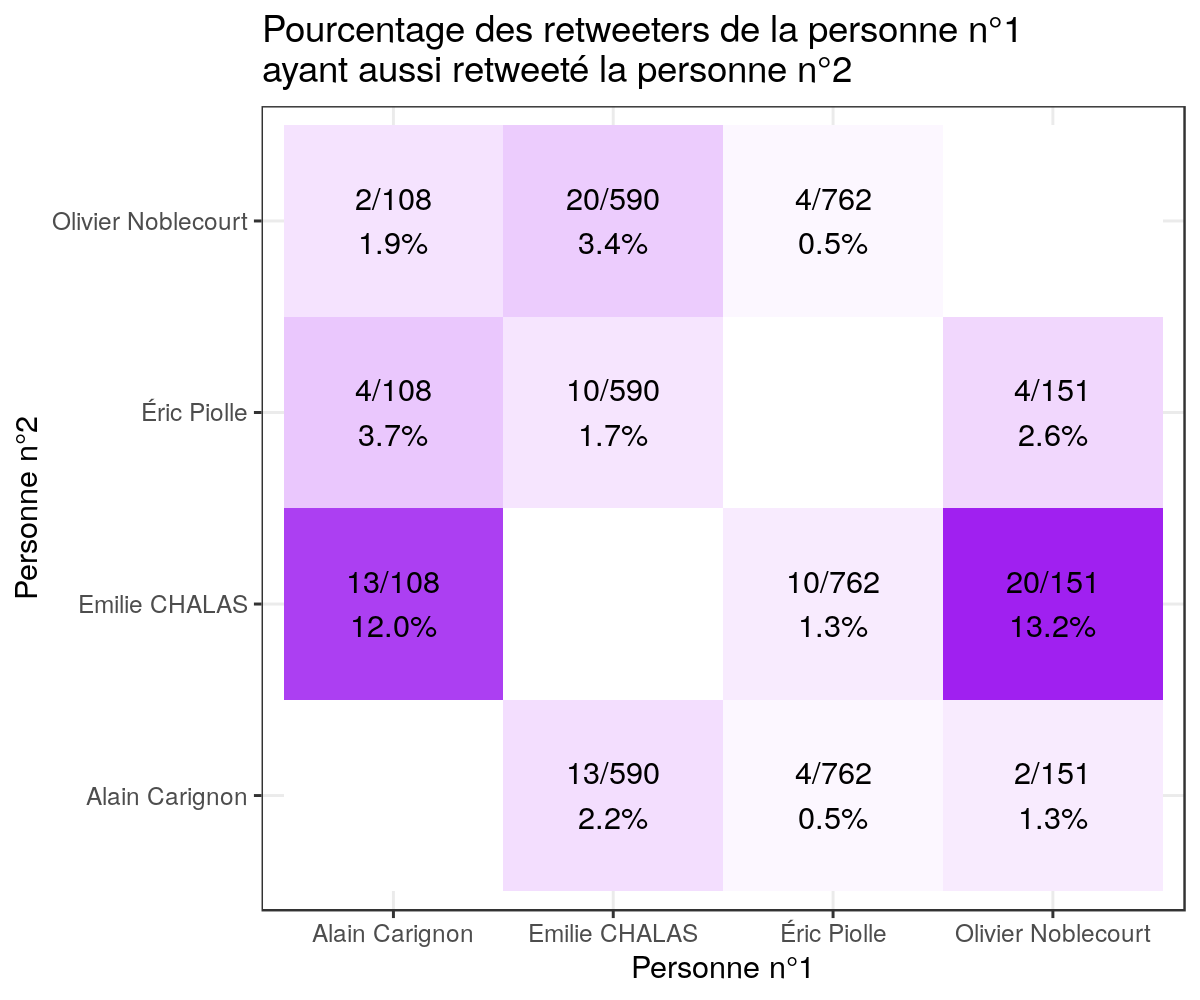

In [9]:
%%R -i shared_retweeters -w 6 -h 5 --units in -r 200

library(ggplot2)

plot = ggplot(shared_retweeters) +
    aes(x=candidate, y=other, fill=percent_shared) +
    geom_tile() +
    theme_bw() +
    scale_fill_gradient2(high = "purple") +
    geom_text(aes(label = text), color = "black") +
    xlab('Personne n°1') +
    ylab('Personne n°2') +
    theme(legend.position='none') +
    ggtitle('Pourcentage des retweeters de la personne n°1\nayant aussi retweeté la personne n°2')
#ggsave('/tmp/shared_followers.png', plot, width=6, height=5)
plot

Problem: twitter only gives a small subset of the retweeters. For instance, take the most retweeted tweet. We have **much less** retweeters than retweets. This is also true if you go to the actual tweet (see the URL) and check who retweeted this, only a small list.

In [10]:
max_rt = tweets['retweets'].max()
print(max_rt)
max_rt = df[df['retweets'] == max_rt]
print(len(max_rt))
print(f'https://twitter.com/foo/status/{max_rt["tweet_id"].unique()[0]}')

865
44
https://twitter.com/foo/status/1203358092496449536


## Localisation

In [11]:
df.columns

Index(['user_id', 'name', 'screen_name', 'date', 'description',
       'followers_count', 'following_count', 'statuses_count', 'likes_count',
       'default_background', 'default_avatar', 'verified', 'listed_count',
       'protected', 'id', 'location', 'tweet_id', 'name_candidate', 'login',
       'likes', 'retweets', 'text', 'date_candidate', 'in_reply', 'source',
       'coordinates', 'geo', 'id_candidate'],
      dtype='object')

In [12]:
import re

def count_locations(df, locations):
    df = df.copy()
    df.loc[df['location'].isna(), 'location'] = 'no_location'
    result = []
    for login in df['login'].unique():
        tmp = df[df['login'] == login]
        for loc in locations:
            loc = '|'.join(loc)
            nb_loc = len(tmp['location'].str.extractall(r'(?P<ville>%s)' % loc, re.IGNORECASE))
            nb_total = len(tmp)
            result.append({
                'login': login,
                'name': names[login],
                'tag': users[login],
                'location': loc,
                'count': nb_loc,
                'percent': nb_loc/nb_total*100,
            })
    result = pandas.DataFrame(result)
    return result

locations = count_locations(df, [['Grenoble'], ['Paris']])
others = count_locations(df, [['Nantes', 'Rennes', 'Bordeaux', 'Strasbourg', 'Toulouse', 'Marseille', 'Montpellier', 'Nice', 'Lyon']])
others['location'] = 'Autres grandes villes FR'
noloc = count_locations(df, [['no_location']])
noloc['location'] = 'Non spécifiée'
locations = pandas.concat([locations, others, noloc])

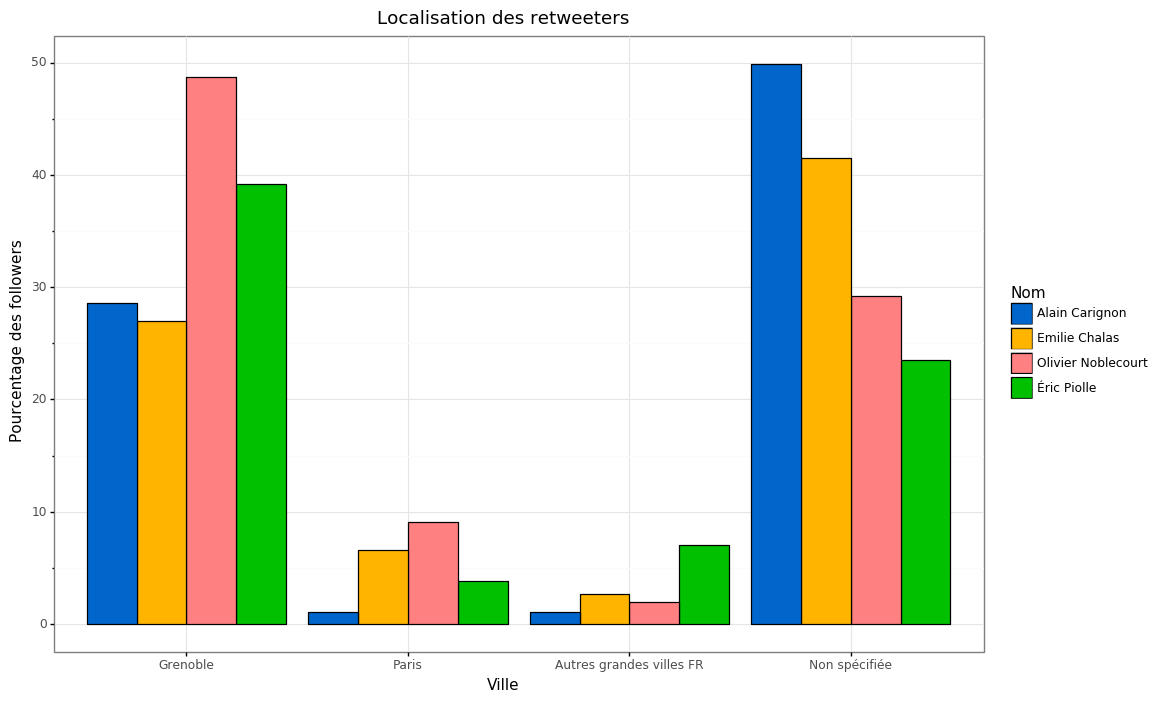

<ggplot: (8736291631834)>

In [13]:
ggplot(locations) +\
    aes(x='location', y='percent', group='name') +\
    geom_bar(aes(fill='name', group='name'), stat='identity', color='black', position='dodge') +\
    theme_bw() +\
    scale_fill_manual(colors2) +\
    ylab('Pourcentage des followers') +\
    xlab('Ville') +\
    labs(fill='Nom') +\
    scale_x_discrete(limits=['Grenoble', 'Paris', 'Autres grandes villes FR', 'Non spécifiée']) +\
    ggtitle('Localisation des retweeters')

## Comtpes vérifiés

In [14]:
for login in df['login'].unique():
    tmp = df[(df['login'] == login) & (df['verified'])].sort_values(by='followers_count', ascending=False)[['name_candidate', 'name']].drop_duplicates().head(n=5)
    print(tmp[['name_candidate', 'name']])

     name_candidate                     name
74      Éric Piolle             Anne Hidalgo
1323    Éric Piolle           David Cormand🌻
1641    Éric Piolle         Barbara Romagnan
2519    Éric Piolle  Mireille d'Ornano 💐🇫🇷🐝ن
     name_candidate                name
967   Emilie CHALAS    Michel Grossiord
2891  Emilie CHALAS           En Marche
29    Emilie CHALAS  🇫🇷 MarleneSchiappa
4071  Emilie CHALAS       Laurent Nunez
3478  Emilie CHALAS       Députés LaREM
          name_candidate                                              name
752   Olivier Noblecourt                                 Jean-Louis Bianco
1249  Olivier Noblecourt                                           Uniopss
3600  Olivier Noblecourt  Délégation interministérielle contre la pauvreté
Empty DataFrame
Columns: [name_candidate, name]
Index: []
